In [1]:
import numpy as np
real_labels = list(np.load('../Features/test_label.npy'))
feature1 = np.load('../Features/Origin_test.npy') 
feature2 = np.load('../Features/PTCLPAMP_Without_Contrastive_test.npy')
feature3 = np.load('../Features/PTCLPAMP_test.npy')
# pca_visualize_comparison(feature1,feature2,feature3,real_labels)

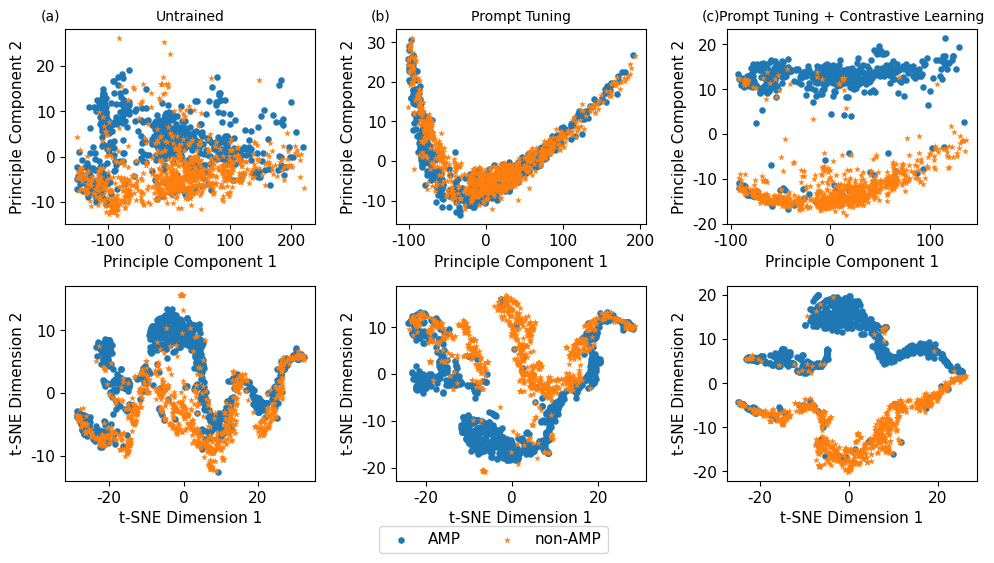

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 设置字体等参数
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.unicode_minus'] = False

def combined_visualize_comparison(feature1, feature2, feature3, labels):
    def pca_transform(features):
        pca = PCA(n_components=2)
        return pca.fit_transform(features)

    def tsne_transform(features):
        tsne = TSNE(n_components=2, perplexity=45, random_state=42, n_iter=400)
        return tsne.fit_transform(features)

    pc1 = pca_transform(feature1)
    pc2 = pca_transform(feature2)
    pc3 = pca_transform(feature3)

    ts1 = tsne_transform(feature1)
    ts2 = tsne_transform(feature2)
    ts3 = tsne_transform(feature3)

    fig, axes = plt.subplots(2, 3, figsize=(10, 6))

    datasets_pca = [(pc1, "Untrained"),
                    (pc2, "Prompt Tuning"),
                    (pc3, "Prompt Tuning + Contrastive Learning")]

    datasets_tsne = [(ts1, "Untrained"),
                     (ts2, "Prompt Tuning"),
                     (ts3, "Prompt Tuning + Contrastive Learning")]

    markers = {0: '*', 1: 'o'}
    colors = {0: '#e9b383', 1: '#7c9d97'}

    for col_idx, ((ax_pca, (pc, title_pca)), (ax_tsne, (ts, title_tsne))) in enumerate(zip(zip(axes[0], datasets_pca), zip(axes[1], datasets_tsne))):
        # 绘制PCA部分（第一行）
        for label in [1, 0]:
            indices = [i for i, l in enumerate(labels) if l == label]
            print_label = "AMP" if label == 1 else "non-AMP"
            ax_pca.scatter(pc[indices, 0], pc[indices, 1], label=print_label, s=20, marker=markers[label],
                           linewidths=0.2)
        ax_pca.set_title(title_pca, fontsize=10)
        ax_pca.set_xlabel('Principle Component 1', fontsize=11)
        ax_pca.set_ylabel('Principle Component 2', fontsize=11)
        ax_pca.grid(False)

        # 在左上角添加标签
        ax_pca.text(-0.10, 1.10, f'({chr(97 + col_idx)})', transform=ax_pca.transAxes, fontsize=10, va='top')

        # 绘制t-SNE部分（第二行）
        for label in [1, 0]:
            indices = [i for i, l in enumerate(labels) if l == label]
            print_label = "AMP" if label == 1 else "non-AMP"
            ax_tsne.scatter(ts[indices, 0], ts[indices, 1], label=print_label, s=20, marker=markers[label],
                           linewidths=0.2)
        ax_tsne.set_xlabel('t-SNE Dimension 1', fontsize=11)
        ax_tsne.set_ylabel('t-SNE Dimension 2', fontsize=11)
        ax_tsne.grid(False)

    # 移除第二行子图的标题
    for ax_tsne in axes[1]:
        ax_tsne.set_title("")

    # 调整子图间距以使一二两行子图尽量靠近
    plt.subplots_adjust(hspace=0.1)

    handles_pca, labels_pca = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles_pca, labels_pca, loc='lower center', bbox_to_anchor=(0.5, 0.00), fontsize=11, ncol=2)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('../Figures/INDEP/color_english/compared_visualization.svg', bbox_inches='tight', dpi=1200)
    plt.show()

# 示例调用
combined_visualize_comparison(feature1, feature2, feature3, real_labels)